ROC AUC Score: 0.3588
Average Precision Score: 0.1513


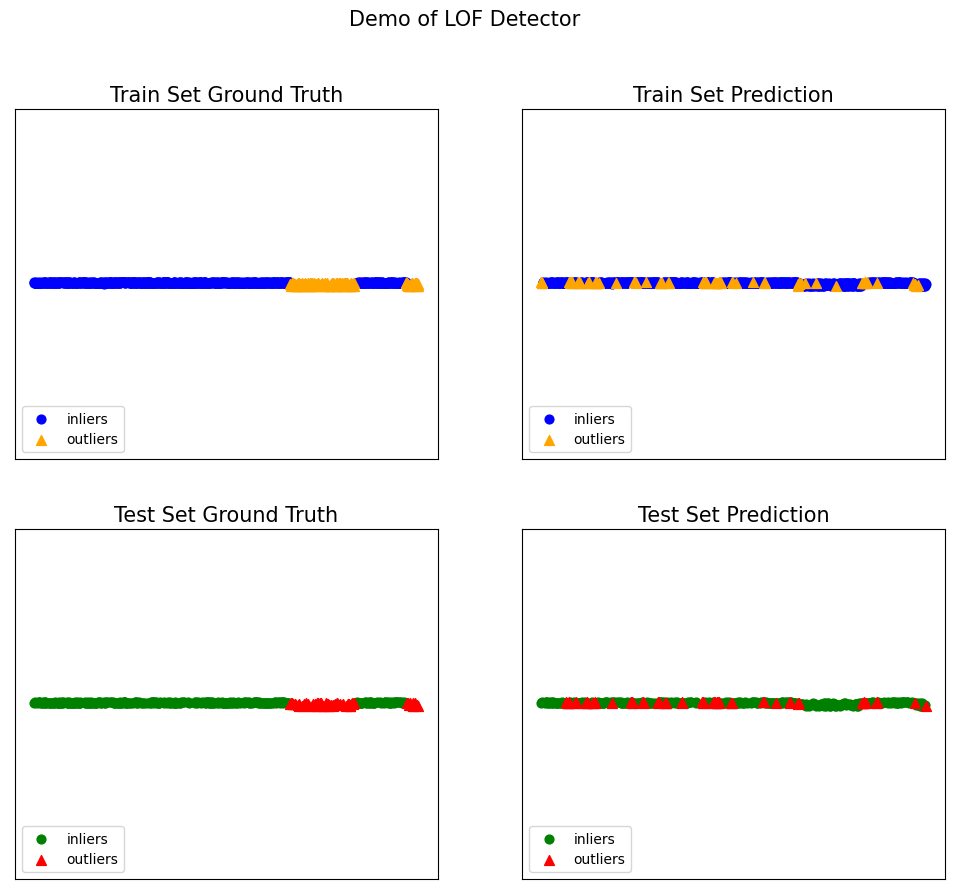

n_neighbors: 2, ROC AUC: 0.5018, Average Precision: 0.2694
n_neighbors: 4, ROC AUC: 0.4747, Average Precision: 0.2414
n_neighbors: 6, ROC AUC: 0.5014, Average Precision: 0.2223
n_neighbors: 8, ROC AUC: 0.5888, Average Precision: 0.2755
n_neighbors: 10, ROC AUC: 0.5929, Average Precision: 0.2974
n_neighbors: 12, ROC AUC: 0.5874, Average Precision: 0.3102
n_neighbors: 14, ROC AUC: 0.5707, Average Precision: 0.3021
n_neighbors: 16, ROC AUC: 0.5765, Average Precision: 0.3084
n_neighbors: 18, ROC AUC: 0.5846, Average Precision: 0.3066
n_neighbors: 20, ROC AUC: 0.6034, Average Precision: 0.3141

Best n_neighbors based on ROC AUC:
n_neighbors: 20, ROC AUC: 0.6034

Best n_neighbors based on Average Precision:
n_neighbors: 20, Average Precision: 0.3141


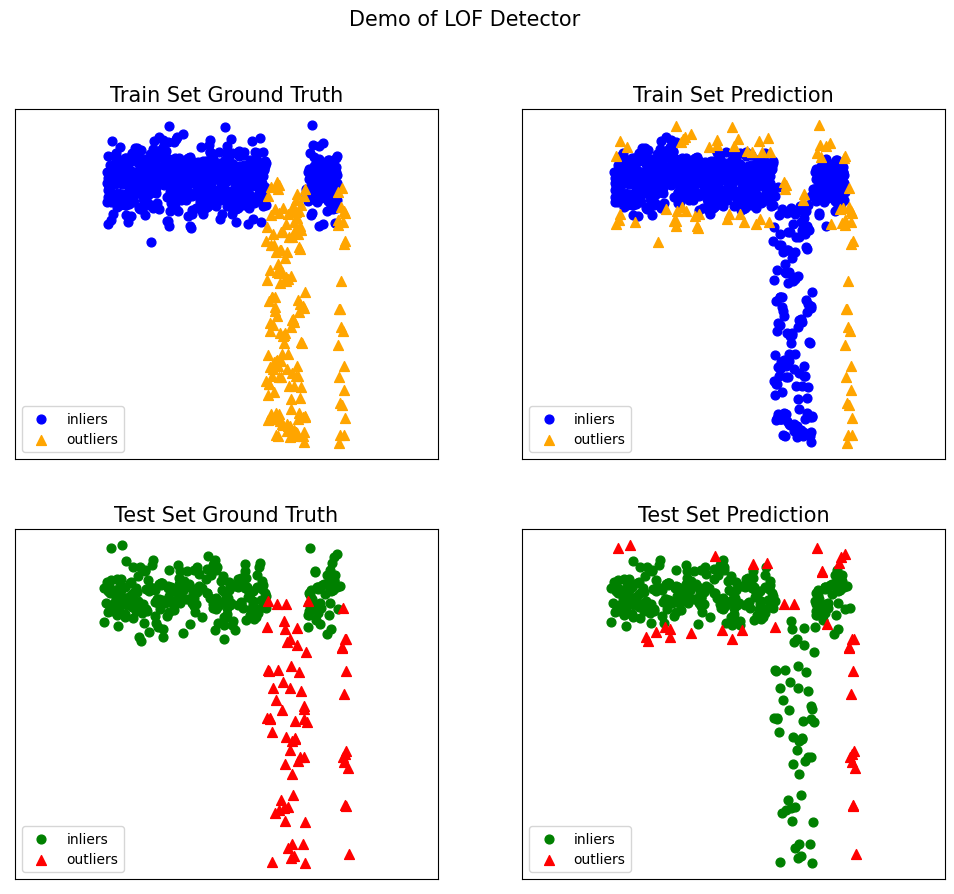

In [21]:
from pyod.models.lof import LOF

# Task 3

# ############################################################  Repeat Task 1 with LOF instead

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Step 2: Initialize the LOF model
clf = LOF(n_neighbors=10, metric="euclidean")

# Step 3: Fit the model on the training data
clf.fit(X_train)

# Step 4: Get the outlier scores and predictions
y_train_scores = clf.decision_scores_  # Outlier scores on the training data
y_train_pred = clf.labels_  # Predicted labels on the training data

y_test_scores = clf.decision_function(X_test)  # Outlier scores on the test data
y_test_pred = clf.predict(X_test)  # Predicted labels on the test data

# Step 5: Evaluate the model
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")

avg_precision = average_precision_score(y_test, y_test_scores)
print(f"Average Precision Score: {avg_precision:.4f}")

# Step 6: Visualize the results
visualize(
    "LOF",
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    show_figure=True,
    save_figure=False
)

############################################################  Repeat Task 2 with LOF instead
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Step 2: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define hyperparameter range
n_neighbors_list = list(range(2, 21, 2))  # [2, 4, 6, ..., 20]

# Step 4: Initialize variables to store the best results
best_auc = 0
best_avg_precision = 0
best_n_neighbors_auc = None
best_n_neighbors_avg_precision = None

# Step 5: Perform exhaustive search over n_neighbors
for n_neighbors in n_neighbors_list:
    # Initialize the LOF model with current n_neighbors
    clf = LOF(n_neighbors=n_neighbors, metric="euclidean")
    
    # Fit the model on the training data
    clf.fit(X_train)
    
    # Get the outlier scores on the test data
    y_test_scores = clf.decision_function(X_test)
    
    # Calculate performance metrics
    roc_auc = roc_auc_score(y_test, y_test_scores)
    avg_precision = average_precision_score(y_test, y_test_scores)
    
    # Print the results for each n_neighbors
    print(f"n_neighbors: {n_neighbors}, ROC AUC: {roc_auc:.4f}, Average Precision: {avg_precision:.4f}")
    
    # Update the best parameters based on ROC AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_n_neighbors_auc = n_neighbors
    
    # Update the best parameters based on Average Precision
    if avg_precision > best_avg_precision:
        best_avg_precision = avg_precision
        best_n_neighbors_avg_precision = n_neighbors

# Step 6: Report the best n_neighbors
print("\nBest n_neighbors based on ROC AUC:")
print(f"n_neighbors: {best_n_neighbors_auc}, ROC AUC: {best_auc:.4f}")

print("\nBest n_neighbors based on Average Precision:")
print(f"n_neighbors: {best_n_neighbors_avg_precision}, Average Precision: {best_avg_precision:.4f}")

# Step 7: Visualize the results using the best n_neighbors (based on ROC AUC)
clf_best = LOF(n_neighbors=best_n_neighbors_auc, metric="euclidean")
clf_best.fit(X_train)
y_train_pred = clf_best.labels_
y_test_scores = clf_best.decision_function(X_test)
y_test_pred = clf_best.predict(X_test)

# Visualize the results
visualize(
    "LOF",
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    show_figure=True,
    save_figure=False
)